In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from kalmanfilter import OptimizedKalmanFilter

sns.set_theme(style='darkgrid')

In [2]:
df_ufi = pd.read_csv('us_financial_indices_2021.csv').assign(
    DATE=lambda d: pd.to_datetime(d.DATE)
).set_index('DATE')
df_ufi

,DJIA,SP500,NASDAQ100
DATE,,,
2021-01-04,30223.89,3700.65,12694.66
2021-01-05,30391.60,3726.86,12802.38
2021-01-06,30829.40,3748.14,12623.35
2021-01-07,31041.13,3803.79,12939.57
2021-01-08,31097.97,3824.68,13105.20
...,...,...,...
2021-12-27,36302.38,4791.19,16567.50
2021-12-28,36398.21,4786.35,16488.66
2021-12-29,36488.63,4793.06,16491.01


In [3]:
lr_sp500 = np.log(df_ufi.SP500).diff().dropna()
lr_sp500

DATE
2021-01-05    0.007058
2021-01-06    0.005694
2021-01-07    0.014738
2021-01-08    0.005477
2021-01-11   -0.006576
                ...   
2021-12-27    0.013744
2021-12-28   -0.001011
2021-12-29    0.001401
2021-12-30   -0.002994
2021-12-31   -0.002630
Name: SP500, Length: 251, dtype: float64

In [4]:
df_fit = OptimizedKalmanFilter(y=lr_sp500, x0=0, v0=1, q0=1, r0=1).filter()
df_fit

,y,x,v
DATE,,,
2021-01-05,0.007058,0.007058,0.000012
2021-01-06,0.005694,0.005694,0.000012
2021-01-07,0.014738,0.014738,0.000012
2021-01-08,0.005477,0.005477,0.000012
2021-01-11,-0.006576,-0.006576,0.000012
...,...,...,...
2021-12-27,0.013744,0.013744,0.000012
2021-12-28,-0.001011,-0.001011,0.000012
2021-12-29,0.001401,0.001401,0.000012


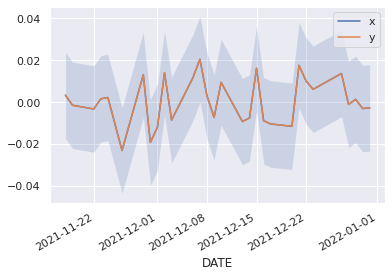

In [5]:
df_plt = df_fit.tail(30)
radius = np.sqrt(df_plt.v) * 6
df_plt[['x', 'y']].plot.line()
plt.fill_between(df_plt.index, df_plt.x - radius, df_plt.x + radius, alpha=0.2)